<H3 align = "right">Spring 2025 Computer Project 01</H3>

## Group Number: 10
 

## Names of Student in Group:
- Name: Paddy Lin
- Name: `name_2`
- Name: `name_3`


In [6]:
# You shouldn't need anything beyond these imports.  If you feel you do, talk to me.
# You will need to import these inside of the respective py files.
import numpy as np

---  
# Part 1 (5 points)

Set up a Git repository on Github for this project.  Only *one person* from the group should make the repository and then add the other group members as collaborators.  Being a collaborator gives you full commit and push access.  In a typical setting, someone else would own the repository, and you would only be able to request that the repository owner would merge your changes through a pull request.
* Creating a repository: https://docs.github.com/en/repositories/creating-and-managing-repositories/quickstart-for-repositories
* Adding collaborators: https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-personal-account-on-github/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository

By the end of this assignment your repository should contain this notebook (mostly unchaged), `riemann.py` and `barycentric.py`.

---
# Part 2 (15 points)
The Riemann integral of a function measures the (signed) area between a curve and the x-axis over some interval.  Given a function $f: \mathbb{R}\rightarrow\mathbb{R}$, the Riemann integral over the interval $[a,b]$ is $$\int_a^b f(x) dx.$$
There are a variety of ways to approximate this value:
* The *left-endpoint* method approximates with $f(a)\cdot(b-a)$ (the rectangle with height $f(a)$ and width $(b-a)$)
* The *trapezoidal* method approximates with the trapezoid with vertices $(a,0), (a, f(a)), (b, f(b)),$ and $(b, 0)$.
* *Simpson's* method approximates with $\frac{b-a}{6}\left(f(a) + 4f(\frac{a+b}{2}) + f(b)\right)$

These are very crude estimates $[a,b]$ is large, so typically we break the interval up into smaller sub-intervals by taking points $a = x_0 < x_1 < \dots < x_n = b $ and summing up the approximations over each interval $[x_i, x_{i+1}]$.

## Your Task
* Create a file `riemann.py` in your repository.
* Within this file create functions `left_endpoint`, `trapezoid`, and `simpson`.  These functions will approximate Riemann integrals.
* Each function will have the same signature with two input arguments:
    * `x_vals: np.ndarray`, a one-dimensional NumPy array containing the x-values used in approximating the integral.  These are the values $x_n$ as above.  In particular, the interval to integrate over is `[x_vals[0], x_vals[-1]]`
    * `func: np.ufunc`, a NumPy universal function to approximate the integral of.


### Testing Code
The below can be used to help test your code.  It uses the functions you write to verify that the $\int_0^\pi \sin(x)dx = 2$.  You should edit this cell to approximate other integrals as this test alone is not terribly thorough.

In [7]:
import numpy as np
import riemann

# You may change these definitions to approximate other intervals
x_vals = np.linspace(0, np.pi, 10000)
func = np.sin

# You don't need to change anything below this line
left_endpoint_sum = riemann.left_endpoint(x_vals, func)
trapezoid_sum = riemann.trapezoid(x_vals, func)
simpson_sum = riemann.simpson(x_vals, func)

print(f"Left Endpoint: {left_endpoint_sum}")
print(f"    Trapezoid: {trapezoid_sum}")
print(f"      Simpson: {simpson_sum}")

ModuleNotFoundError: No module named 'riemann'

---
# Part 3 (10 points)
A common question in computer graphics is determining whether a point lies within a triangle.  Here we'll consider only case when the point and the triangle lie in the plane.  One way to answer this question is through the use of *barycentric coordinates*.  Given a triangle with vertices $A_1=(x_1, y_1), A_2=(x_2, y_2),$ and $A_3 = (x_3, y_3)$ and a point $P=(x, y)$ the barycentric coordinates of $P$ are $(\lambda_1, \lambda_2, \lambda_3)$ which satisfy the following two conditions.

$$\begin{align*}
\lambda_1 x_1 + \lambda_2 x_2 + \lambda_3 x_3 &= x \\
\lambda_1 y_1 + \lambda_2 y_2 + \lambda_y x_3 &= y \\
\lambda_1 + \lambda_2 + \lambda_3 &= 1
\end{align*}$$

The first two conditions can be interpreted as $\lambda_1 A_1 + \lambda_2 A_2 + \lambda_3 A_3 = P$.  The relevant property of barycentric coordinates is that a point is inside of the the triangle if all coordinates are non-negative.

## Your Task
To answer this question, do the following:
* Add a file `barycentric.py` to your repository.  Within this file you are to define three functions: `get_barycentric_coordinates`, `get_cartesian_coordinates`, and `is_inside_triangle`
* The function `get_barycentric_coordinates`:
    * Takes two input arguments:
        1. A 2-by-3 array called `triangle_coordinates` which has the form $\begin{pmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3 \end{pmatrix}$ using the notation above.
        2. A 1d array called `point_coordinates` which has the form $(x, y)$ using the notation above.
    * Returns a 1d array which has the form $(\lambda_1 \lambda_2 \lambda_3)$
* The function `get_cartesian_coordinates`:
    * Takes two input arguments:
        1. A 2-by-3 array called `triangle_coordinates` which has the form $\begin{pmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3 \end{pmatrix}$ using the notation above.
        2. A 1d array called `barycentric_coordinates` which has the form $(\lambda_1, \lambda_2, \lambda_3)$ using the notation above.
    * Returns a 1d array which has the form $(x, y)$
* The function `is_inside_triangle` takes the same input arguments as `get_barycentric_coordinates` but it returns a `bool` as to whether the point lies inside of the triangle or not.

### Some Testing Code
To be kind (and to give you a very basic idea of plotting in Python) I'm giving you some code to let you visually determine whether your `is_inside_triangle` function works.  So you need to have implemented this function prior to testing.
* Specify the vertices of the triangle by redefining `tri_point_list`
* Specify the point you want to test by redefining `test_point`
* When the cell is executed, it will plot your triangle.  The point will be a green dot if it lies within the triangle and red x otherwise.

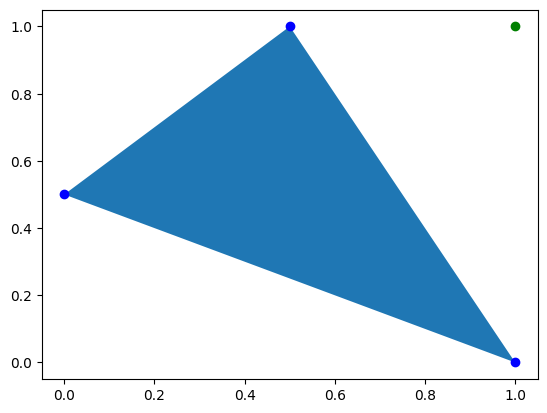

In [4]:
%matplotlib inline
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np

import barycentric

# Replace point_list's definition with your own
tri_point_list = [
    (0.5, 1),
    (0, .5),
    (1, 0)
]

# Replace test_point's definition with your own
test_point = (1, 1)

# You don't need to change anything below this line
point_matrix = np.vstack([tri_point_list[0],
                          tri_point_list[1],
                          tri_point_list[2]]).transpose()

triangle = Polygon(
    tri_point_list,
)

fig, ax = plt.subplots()
ax.add_patch(triangle)

x_vals, y_vals = zip(*tri_point_list)

if barycentric.is_inside_triangle(point_matrix, test_point):
    style = "go"
else:
    style = "rx"

ax.plot(x_vals, y_vals, "bo")
ax.plot([test_point[0]], [test_point[1]], style)

tri_point_list.append(tri_point_list[0])
